Ключи iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...
Название ответов: ['setosa' 'versicolor' 'virginica']
Название признаков: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Тип массива data: <class 'numpy.ndarray'>
Форма массива data: (150, 4)
Первые пять строк массива data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Тип массива target: <class 'numpy.ndarray'>
Форма массива target: (150,)
Ответы: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2

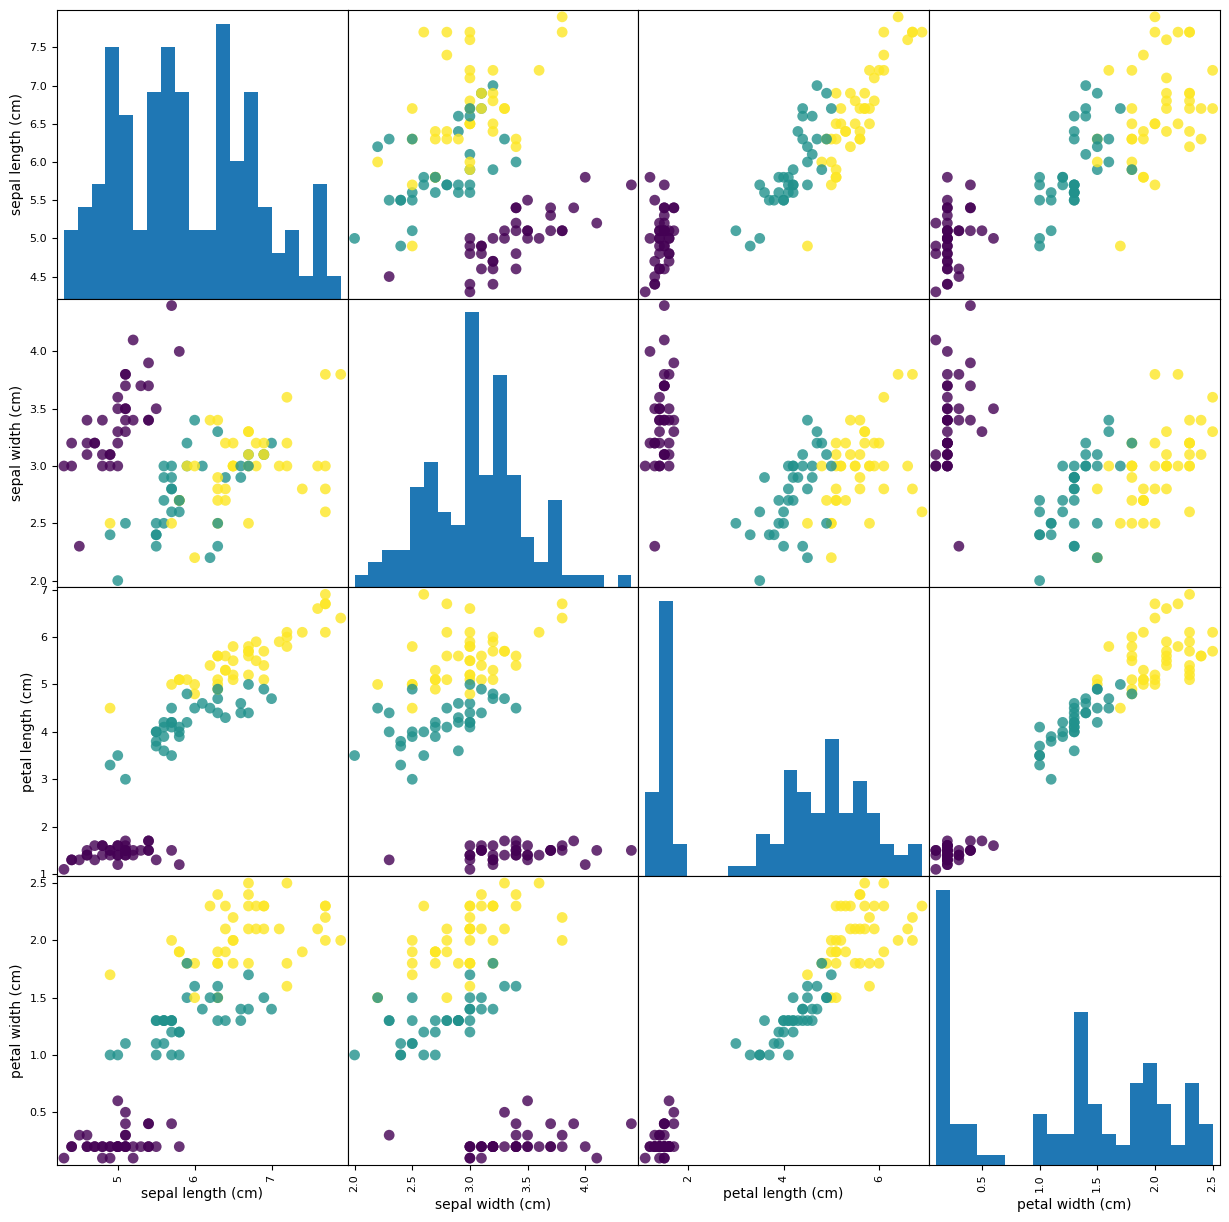

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas.plotting import scatter_matrix
iris_dataset = load_iris()
import numpy as np


print("Ключи iris_dataset: \n{}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + "\n...")

print("Название ответов: {}".format(iris_dataset['target_names']))
print("Название признаков: {}".format(iris_dataset['feature_names']))

print("Тип массива data: {}".format(type(iris_dataset['data'])))
print("Форма массива data: {}".format(iris_dataset['data'].shape))

print("Первые пять строк массива data:\n{}".format(iris_dataset['data'][:5]))

print("Тип массива target: {}".format(type(iris_dataset['target'])))
print("Форма массива target: {}".format(iris_dataset['target'].shape))

print("Ответы: \n{}".format(iris_dataset['target']))


X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

print("форма массива X_train: {}".format(X_train.shape))

print("форма массива y_train: {}".format(y_train.shape))

print("форма массива X_test: {}".format(X_test.shape))

print("форма массива y_test: {}".format(y_test.shape))



# создаем dataframe из данных в массиße X_train

# маркируем столбцы, используя строки в iris_dataset.feature_names

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])
iris_dataframe.head()

# Создаем матрицу рассеяния из DataFrame, цвет точек задаем с помощью y_train
scatter_matrix = scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                                hist_kwds={'bins': 20}, s=60, alpha=.8)

from sklearn.neighbors  import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

X_new = np.array([[5, 2.9, 1, 0.2]])
print("Форма массива X_new: {}".format(X_new.shape))


prediction = knn.predict(X_new)
print("Прогноз: {}".format(
    iris_dataset['target_names'][prediction]))


y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(y_pred))
print("Правильность для тестового набора: {:.2f}".format(np.mean(y_pred == y_test)))


print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))





Classifier MSE: 0.3687150837988827


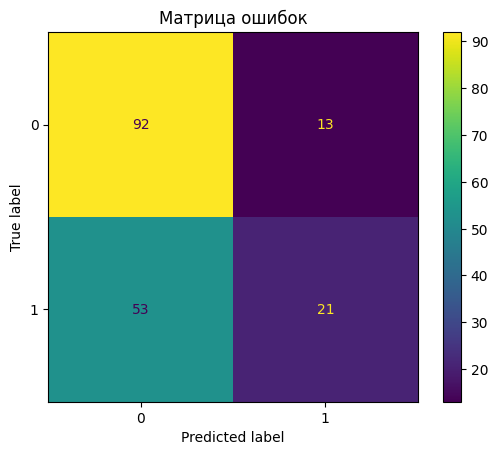

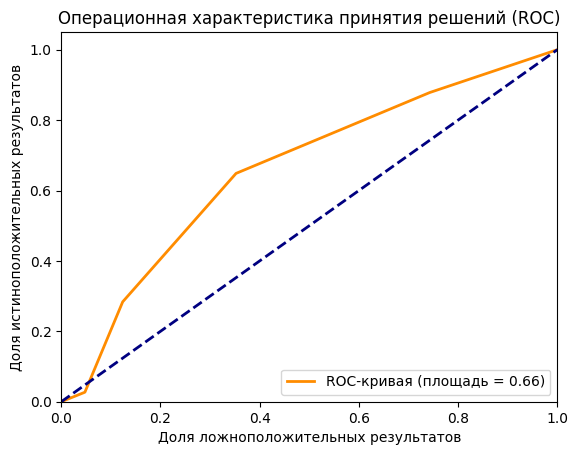

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib

# Установка локали на русский язык для корректного отображения русских букв в графиках
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Загрузка данных
data = pd.read_csv('train.csv')
# Выделение целевой переменной
target = 'Survived'
y = data[target]
X = data.drop(target, axis=1)

# Преобразование категориальных признаков в числовые
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column].astype(str))

# Заполнение пропусков средним значением
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Разделение набора данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Определение параметров для поиска
param_grid = {'n_neighbors': list(range(1, 31))}  # Пробуем различное количество ближайших соседей

# Поиск оптимального количества ближайших соседей
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Обучение модели классификации с оптимальным количеством соседей
knn_classifier = grid_search.best_estimator_

# Оценка качества модели на тестовой выборке
classifier_predictions = knn_classifier.predict(X_test)
classifier_mse = mean_squared_error(y_test, classifier_predictions)
\
print(f'Classifier MSE: {classifier_mse}')

# Визуализация матрицы ошибок
cm = confusion_matrix(y_test, classifier_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Матрица ошибок')
plt.show()

# Вычисление вероятностей для тестового набора
classifier_probs = knn_classifier.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, classifier_probs)
roc_auc = auc(fpr, tpr)

# Визуализация ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-кривая (площадь = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Доля истиноположительных результатов')
plt.title('Операционная характеристика принятия решений (ROC)')
plt.legend(loc="lower right")
plt.show()

Наилучшее количество соседей: 15
Оценка качества модели: 0.6208017334777899
Оценка качества модели (ROC AUC): 0.5744701995995815


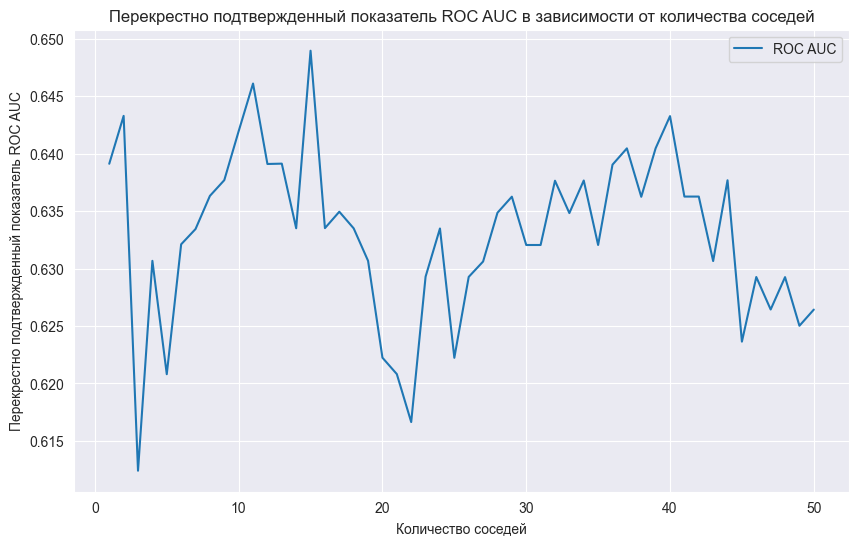

In [48]:
#2
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('train.csv')

# Выделение целевой переменной и признаков
y = data['Survived']
X = data.drop('Survived', axis=1)

# Преобразование категориальных признаков в числовые
categorical_features = X.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for feature in categorical_features:
    X[feature] = encoder.fit_transform(X[feature].astype(str))

# Заполнение пропусков средним значением
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Разделение набора данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Генератор разбивки на блоки
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Поиск наилучшего значения количества соседей
param_grid = {'n_neighbors': np.arange(1, 51)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=kf)
grid_search.fit(X_train, y_train)

# Наилучшее количество соседей
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f'Наилучшее количество соседей: {best_n_neighbors}')

# Оценка качества модели
cv_scores = cross_val_score(knn, X_train, y_train, cv=kf)
print(f'Оценка качества модели: {np.mean(cv_scores)}')

# Пересчет качества модели с использованием другой метрики
scorer = make_scorer(roc_auc_score)
cv_scores_roc_auc = cross_val_score(knn, X_train, y_train, cv=kf, scoring=scorer)
print(f'Оценка качества модели (ROC AUC): {np.mean(cv_scores_roc_auc)}')

# График значений метрики в зависимости от количества соседей
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], grid_search.cv_results_['mean_test_score'], label='ROC AUC')
plt.xlabel("Количество соседей")
plt.ylabel("Перекрестно подтвержденный показатель ROC AUC")
plt.legend()
plt.title("Перекрестно подтвержденный показатель ROC AUC в зависимости от количества соседей")
plt.show()                          

Лучшее значение p (для метрики Минковского): 1.0452261306532664
Лучшее качество модели: 0.6614695163990939


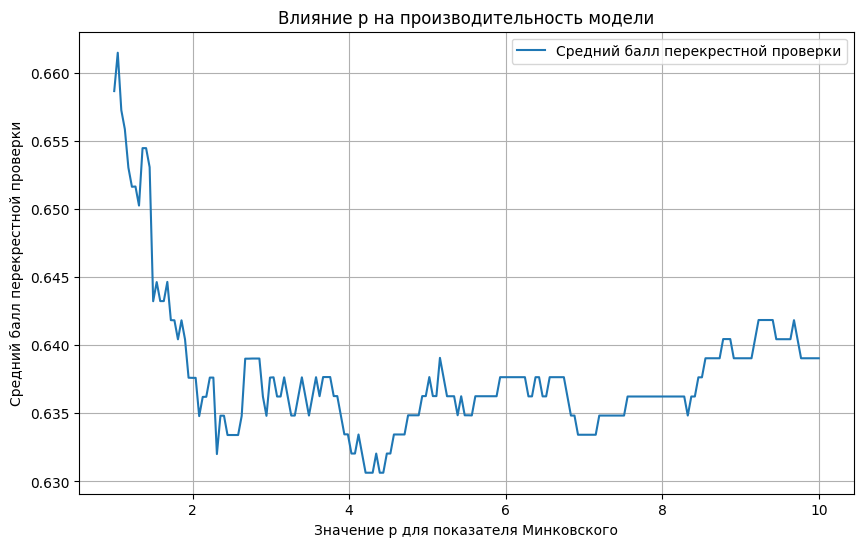

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Предполагаем, что best_n_neighbors - это наилучшее значение количества соседей, найденное ранее
best_n_neighbors = 15  # Замените на ваше наилучшее значение

# Создаем сетку значений параметра p для метрики Минковского
p_values = np.linspace(1.0, 10.0, num=200)

# Инициализируем переменные для отслеживания лучшего значения p и соответствующего качества
best_p = None
best_score = -np.inf
scores_list = []

# Проходим по всем значениям p и находим наилучшее
for p in p_values:
    # Создаем модель kNN с весами, зависящими от расстояния, и метрикой Минковского
    knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights='distance', metric='minkowski', p=p)

    # Выполняем кросс-валидацию и вычисляем среднее качество
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    avg_score = np.mean(scores)
    scores_list.append(avg_score)

    # Если среднее качество лучше, чем предыдущее лучшее, обновляем лучшие значения
    if avg_score > best_score:
        best_score = avg_score
        best_p = p

# Выводим лучшее значение p и соответствующее качество
print(f'Лучшее значение p (для метрики Минковского): {best_p}')
print(f'Лучшее качество модели: {best_score}')

# Визуализация зависимости качества от значения p
plt.figure(figsize=(10, 6))
plt.plot(p_values, scores_list, label='Средний балл перекрестной проверки')
plt.xlabel('Значение p для показателя Минковского')
plt.ylabel('Средний балл перекрестной проверки')
plt.title('Влияние p на производительность модели')
plt.legend()
plt.grid(True)
plt.show()


Predicted label: 0


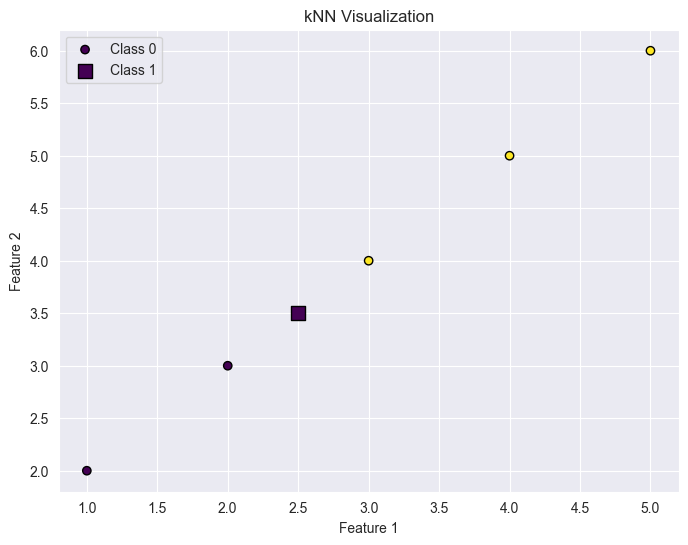

In [51]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Вычисляем расстояния между x и всеми примерами в обучающем наборе
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Получаем k ближайших соседей и их метки
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Возвращаем наиболее распространенную метку среди ближайших соседей
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Пример использования
if __name__ == "__main__":
    # Инициализация данных
    X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
    y_train = np.array([0, 0, 1, 1, 1])
    X_test = np.array([[2.5, 3.5]])

    # Создание и обучение классификатора
    knn = KNN(k=3)
    knn.fit(X_train, y_train)

    # Предсказание метки для тестового примера
    y_pred = knn.predict(X_test)
    print(f'Predicted label: {y_pred[0]}')

    # Визуализация
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolor='k', marker='s', s=100)
    plt.title('kNN Visualization')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(['Class 0', 'Class 1', 'Test Point'])
    plt.grid(True)
    plt.show()